In [52]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [45]:
stocks = pd.read_csv('stocks_filtered.csv')
stocks['date'] = pd.to_datetime(stocks['date'])
stocks = stocks.set_index('date')


In [78]:
stocks.sort_values('date')

,ticker,adj_close
date,,
2017-12-01,GOOG,50.508500
2017-12-01,AMZN,57.977862
2017-12-01,AAPL,40.542754
2017-12-01,NVDA,48.957940
2017-12-01,MSFT,79.231484
...,...,...
2023-06-30,MSFT,340.540000
2023-06-30,AMZN,130.360000
2023-06-30,NVDA,423.020000


# Time series of stock prices

In [46]:
stocks_pivot = pd.pivot_table(stocks, index = stocks.index,
                              columns = "ticker", values = "adj_close")

stocks_pivot.isna().sum()

ticker
AAPL    0
AMZN    0
GOOG    0
MSFT    0
NVDA    0
dtype: int64

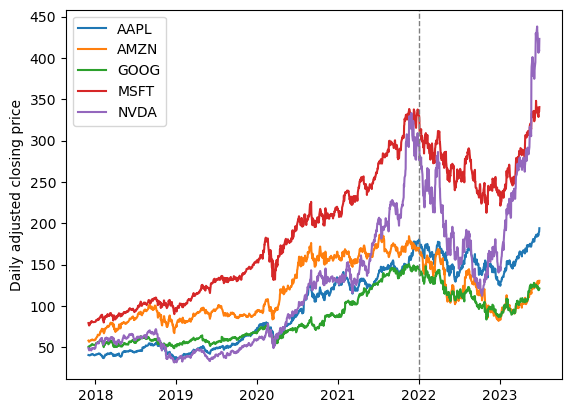

In [77]:
for ticker in stocks_pivot.columns:
    plt.plot(stocks_pivot.index, stocks_pivot[ticker], label = ticker)

plt.axvline(x=pd.to_datetime('2022-01-01'), color='gray', lw=1, ls="--")
plt.legend(loc="upper left")

plt.ylabel('Daily adjusted closing price')

plt.savefig('timeseries.png')

# Auto- and partial auto-correlation

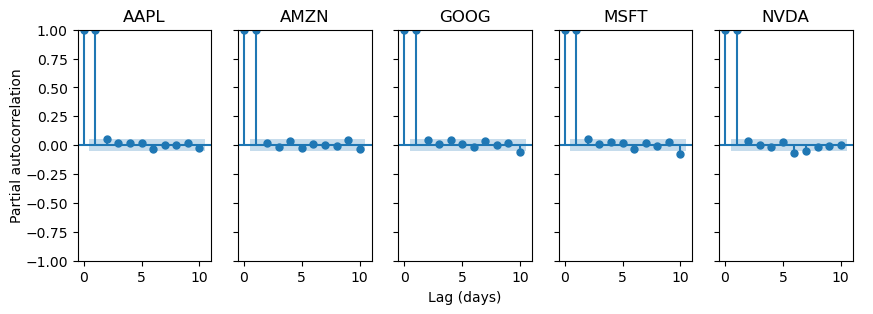

In [106]:
import statsmodels.api as sm

fig, ax = plt.subplots(1, 5, figsize=(10,3), 
                       sharex=True, sharey=True)

for ticker,i in zip(stocks_pivot.columns, range(5)):
    
    sm.graphics.tsa.plot_pacf(stocks_pivot[ticker],lags=10, ax=ax[i])
    ax[i].set_title(ticker)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)



plt.ylabel('Partial autocorrelation\n')
plt.xlabel('Lag (days)')


plt.savefig('PACF.png')

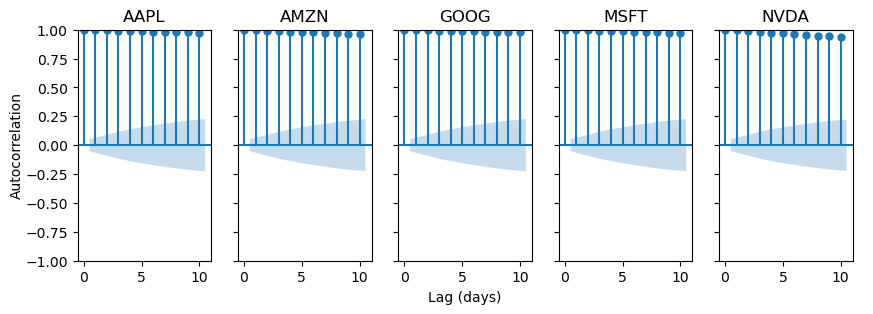

In [110]:
fig, ax = plt.subplots(1, 5, figsize=(10,3), 
                       sharex=True, sharey=True)

for ticker,i in zip(stocks_pivot.columns, range(5)):
    
    sm.graphics.tsa.plot_acf(stocks_pivot[ticker],lags=10, ax=ax[i])
    ax[i].set_title(ticker)

# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)



plt.ylabel('Autocorrelation\n')
plt.xlabel('Lag (days)')

plt.savefig('ACF.png')

# Sentiment analysis